In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, mean_squared_error,
                             mean_absolute_error,
                             r2_score, precision_recall_curve, roc_curve, auc)
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import OrderedDict



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siichee","key":"e05e8401e20ba76d2b260240f201968f"}'}

In [5]:
data = pd.read_csv('../CSV/full_data_flightdelay.csv')

In [6]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [7]:
data.isnull().sum()

,0
MONTH,0
DAY_OF_WEEK,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
SEGMENT_NUMBER,0
CONCURRENT_FLIGHTS,0
NUMBER_OF_SEATS,0
CARRIER_NAME,0
AIRPORT_FLIGHTS_MONTH,0


In [8]:
# columns = [
#     'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
#     'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
#     'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
#     'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
#     'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT',
#     'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'
# ]

columns = [
    'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'CONCURRENT_FLIGHTS', 'DEPARTING_AIRPORT', 'NUMBER_OF_SEATS',
    'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRPORT',
    'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE',
    'PRCP', 'SNOW', 'AWND'
]

data = data[columns]

data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,DEPARTING_AIRPORT,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,PLANE_AGE,PRCP,SNOW,AWND
0,0,0800-0859,2,25,McCarran International,143,13056,107363,1903352,13382999,8,0.0,0.0,2.91
1,0,0700-0759,7,29,McCarran International,191,13056,73508,1903352,12460183,3,0.0,0.0,2.91
2,0,0600-0659,7,27,McCarran International,199,13056,73508,1903352,12460183,18,0.0,0.0,2.91
3,0,0600-0659,9,27,McCarran International,180,13056,73508,1903352,12460183,2,0.0,0.0,2.91
4,0,0001-0559,7,10,McCarran International,182,13056,15023,1903352,2688839,1,0.0,0.0,2.91


In [9]:
data.dropna(inplace=True)

In [10]:
data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,DEPARTING_AIRPORT,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,PLANE_AGE,PRCP,SNOW,AWND
0,0,0800-0859,2,25,McCarran International,143,13056,107363,1903352,13382999,8,0.0,0.0,2.91
1,0,0700-0759,7,29,McCarran International,191,13056,73508,1903352,12460183,3,0.0,0.0,2.91
2,0,0600-0659,7,27,McCarran International,199,13056,73508,1903352,12460183,18,0.0,0.0,2.91
3,0,0600-0659,9,27,McCarran International,180,13056,73508,1903352,12460183,2,0.0,0.0,2.91
4,0,0001-0559,7,10,McCarran International,182,13056,15023,1903352,2688839,1,0.0,0.0,2.91


In [11]:
data.describe()

,DEP_DEL15,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,PLANE_AGE,PRCP,SNOW,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,1.891441e-01,3.821102e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,1.588639e+06,7.814970e+06,1.153211e+01,1.037063e-01,3.159310e-02,8.341329e+00
std,3.916231e-01,2.382233e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,1.123847e+06,5.046882e+06,6.935706e+00,3.432134e-01,3.170163e-01,3.607604e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,7.047600e+04,4.737940e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.732210e+05,2.688839e+06,5.000000e+00,0.000000e+00,0.000000e+00,5.820000e+00
50%,0.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,1.486066e+06,8.501631e+06,1.200000e+01,0.000000e+00,0.000000e+00,7.830000e+00
75%,0.000000e+00,5.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,2.006675e+06,1.246018e+07,1.700000e+01,2.000000e-02,0.000000e+00,1.029000e+01
max,1.000000e+00,1.100000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,4.365661e+06,1.338300e+07,3.200000e+01,1.163000e+01,1.720000e+01,3.378000e+01


In [12]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Number of duplicate rows: 362362
Number of duplicate rows after removal: 0


In [ ]:
excluded_cols = ['CARRIER_NAME_missing', 'DEPARTING_AIRPORT_missing', 'PREVIOUS_AIRPORT_missing']
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()

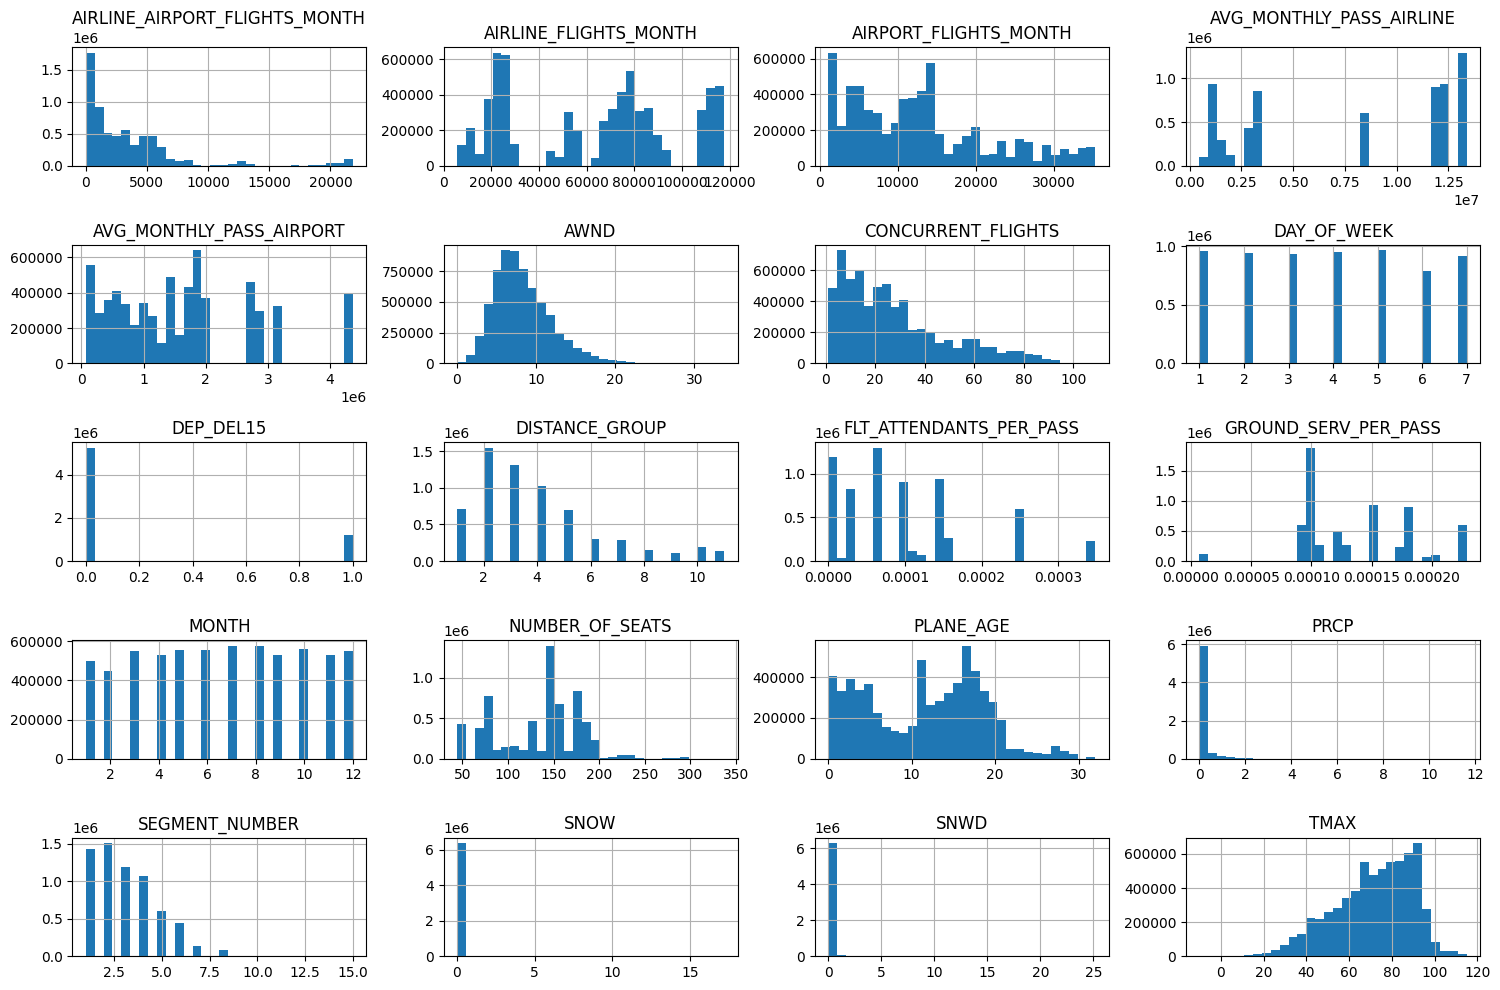

In [ ]:
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

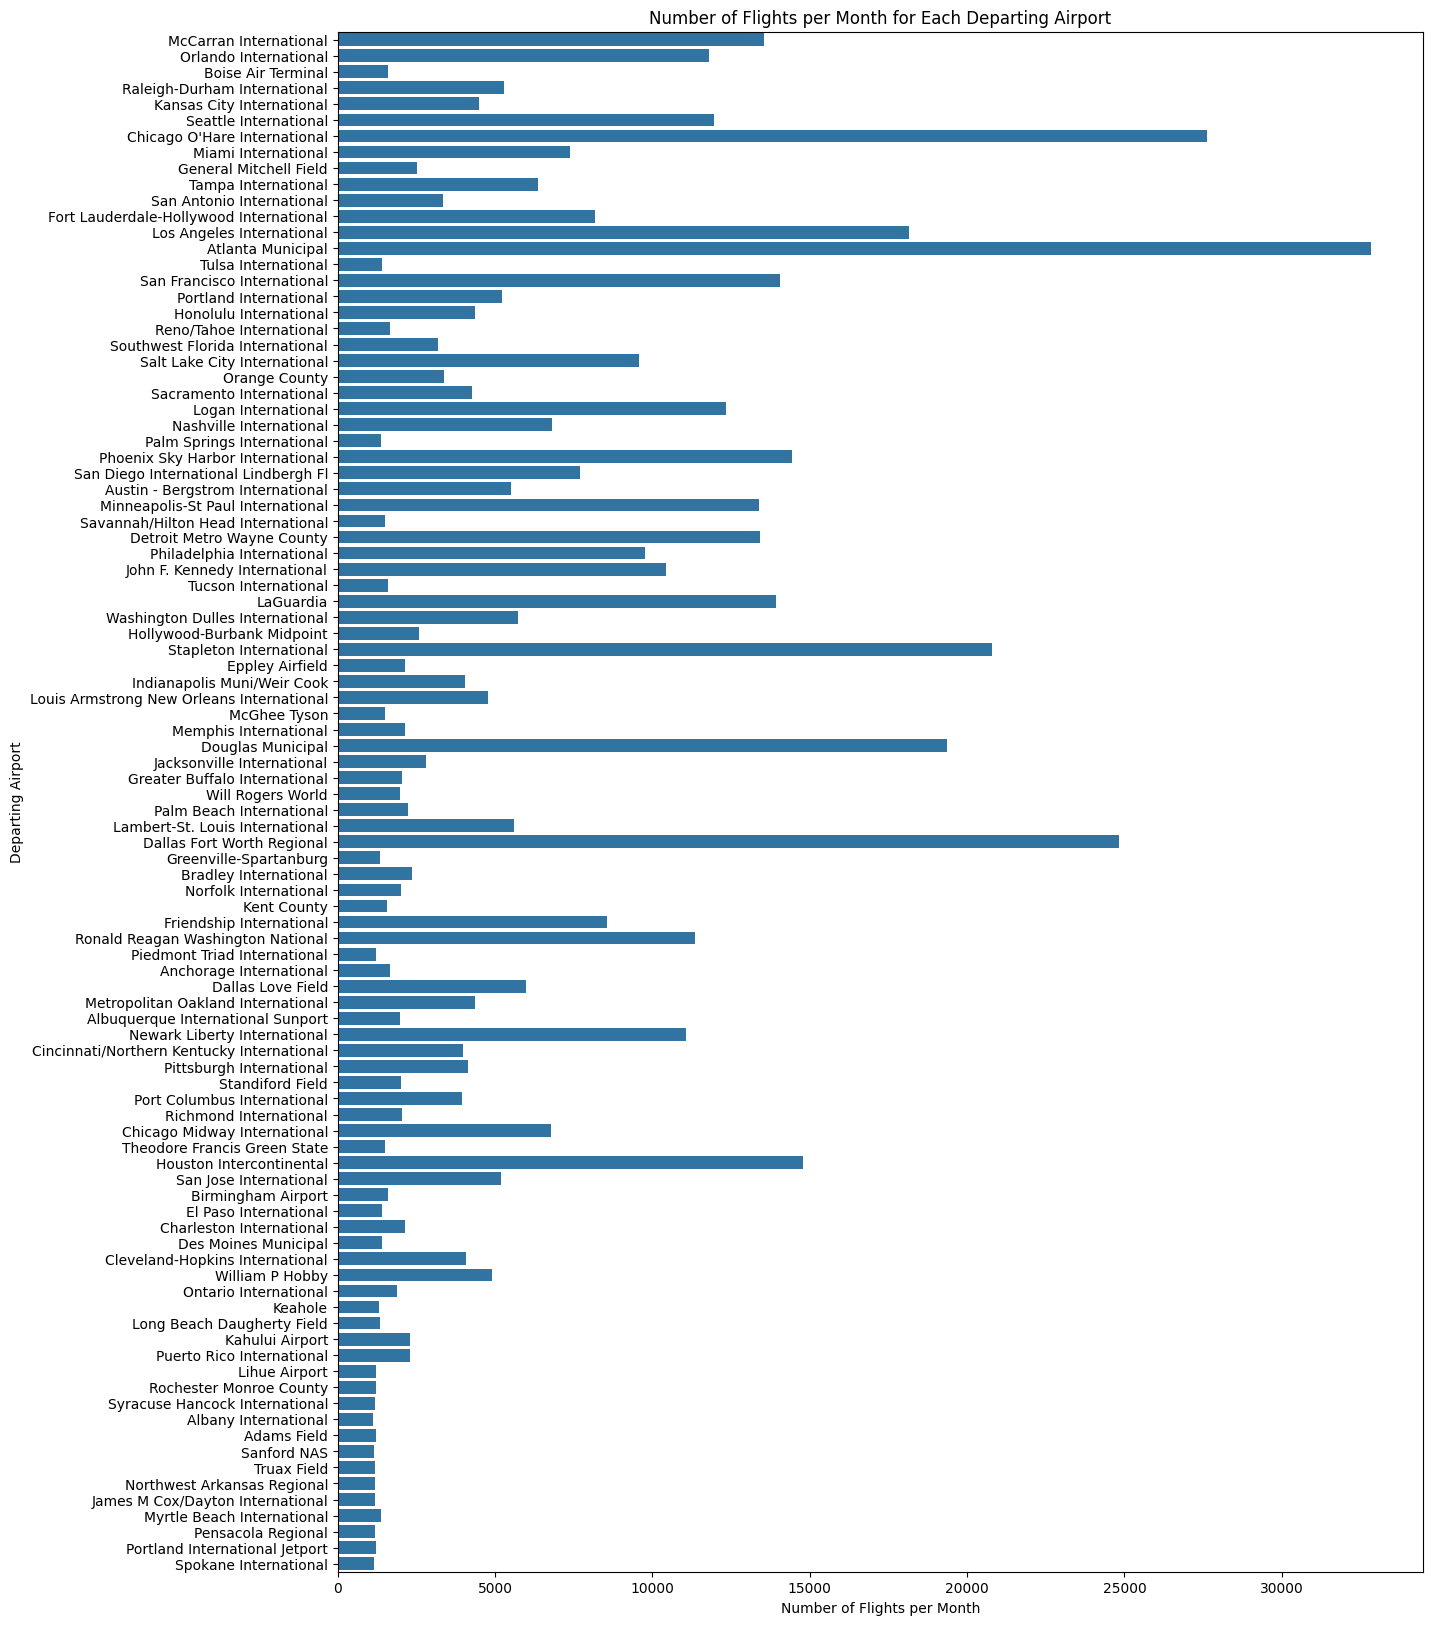

In [ ]:
plt.figure(figsize=(14, 20))
sns.barplot(x='AIRPORT_FLIGHTS_MONTH', y='DEPARTING_AIRPORT', data=data, errorbar=None)
plt.title('Number of Flights per Month for Each Departing Airport')
plt.xlabel('Number of Flights per Month')
plt.ylabel('Departing Airport')
plt.show()

In [13]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

data['PART_OF_DAY'] = pd.cut(
    data['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

data[["DEP_TIME_BLK", "PART_OF_DAY"]].head()

,DEP_TIME_BLK,PART_OF_DAY
0,0800-0859,Morning
1,0700-0759,Morning
2,0600-0659,Morning
3,0600-0659,Morning
4,0001-0559,Early Morning & Late Night


In [14]:
def time_range_to_midpoint(time_range):
    start, end = time_range.split('-')
    start_hour = int(start[:2])
    end_hour = int(end[:2])
    midpoint = (start_hour + end_hour) / 2
    return midpoint

In [15]:
data['DEP_TIME_BLK'] = data['DEP_TIME_BLK'].apply(time_range_to_midpoint)

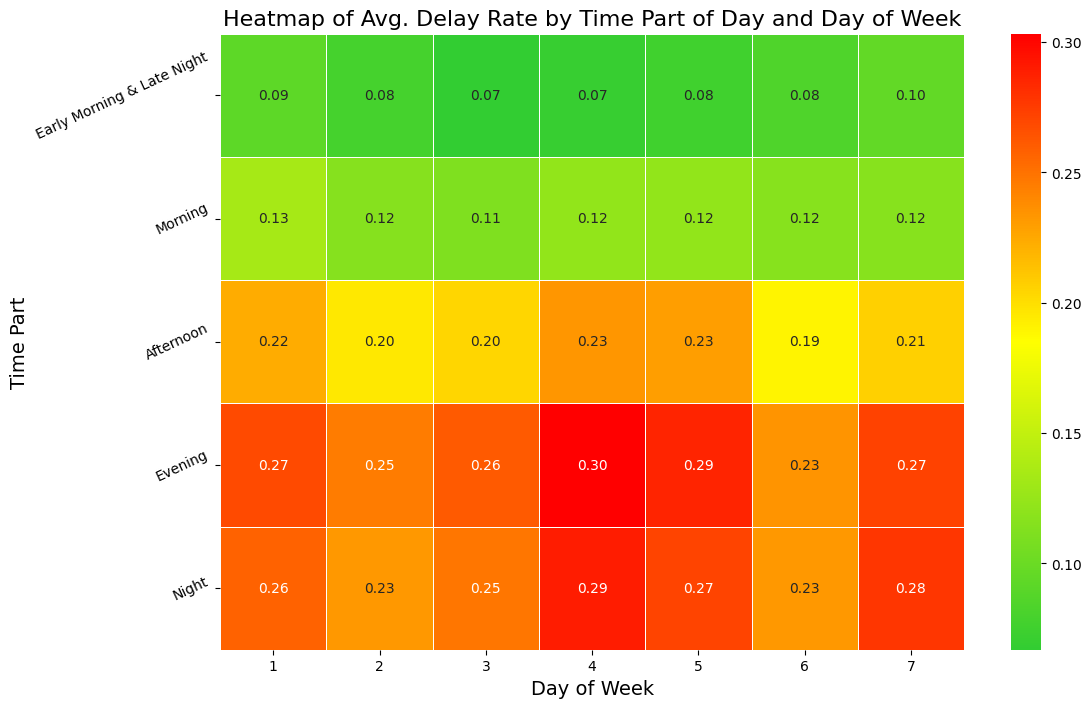

In [ ]:
heatmap_data = pd.pivot_table(
    data,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Time Part', fontsize=14)
plt.yticks(rotation=25)
plt.show()

<Axes: title={'center': 'Max Tempartue Across Months - Line Plot'}, xlabel='Month', ylabel='Max Temparture (F)'>

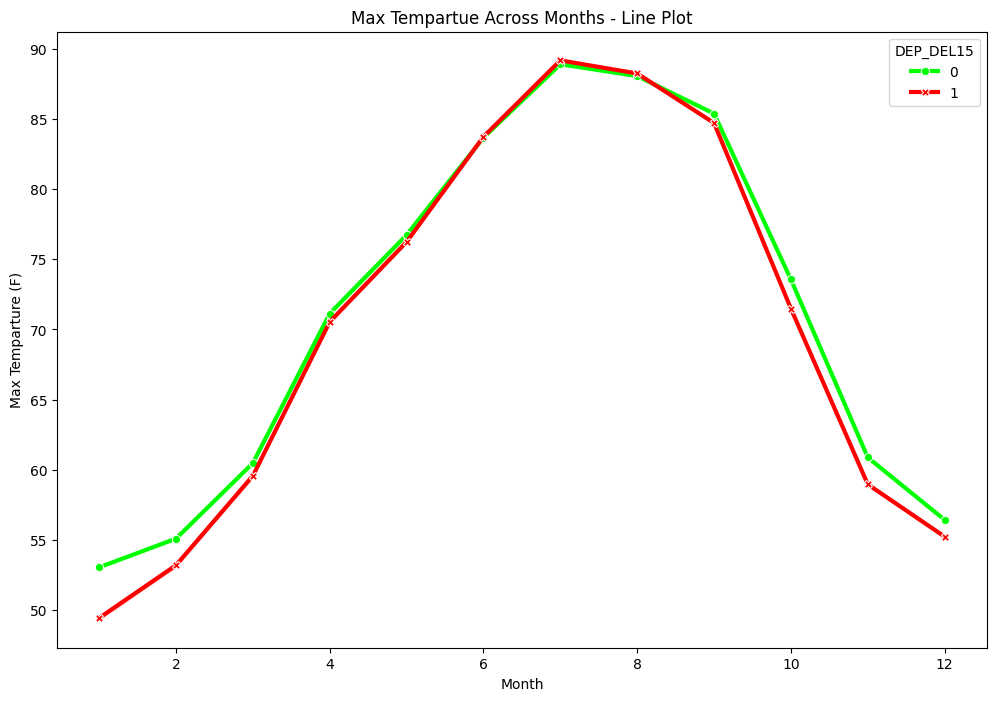

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Max Tempartue Across Months - Line Plot")
plt.xlabel("Month")
plt.ylabel("Max Temparture (F)")
sns.lineplot(x = data.MONTH, y = data.TMAX, hue = data.DEP_DEL15, palette={0: 'lime', 1: 'red'}, style=data.DEP_DEL15, markers=True, dashes=False, linewidth = 3)

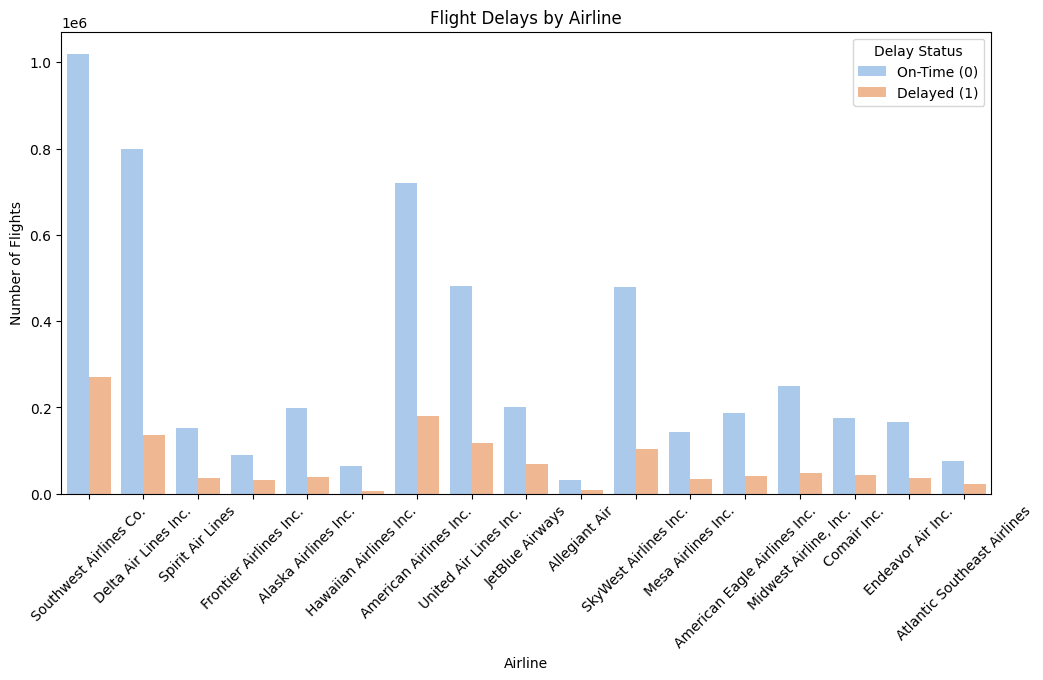

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CARRIER_NAME', hue='DEP_DEL15', data=data, palette='pastel')
plt.title('Flight Delays by Airline')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.legend(title='Delay Status', labels=['On-Time (0)', 'Delayed (1)'])
plt.show()

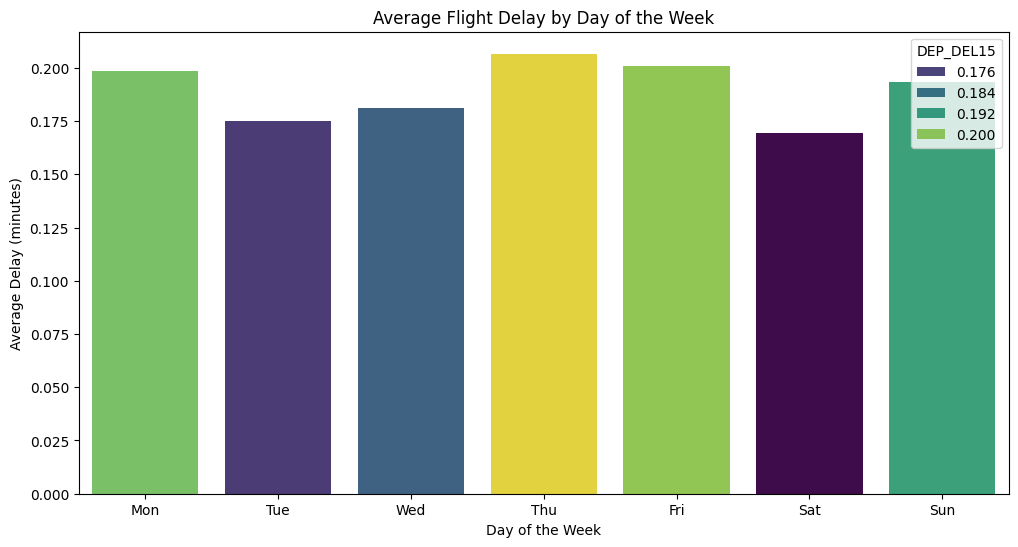

In [ ]:
avg_delay_by_day = data.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=avg_delay_by_day, palette='viridis', hue='DEP_DEL15')
plt.title('Average Flight Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

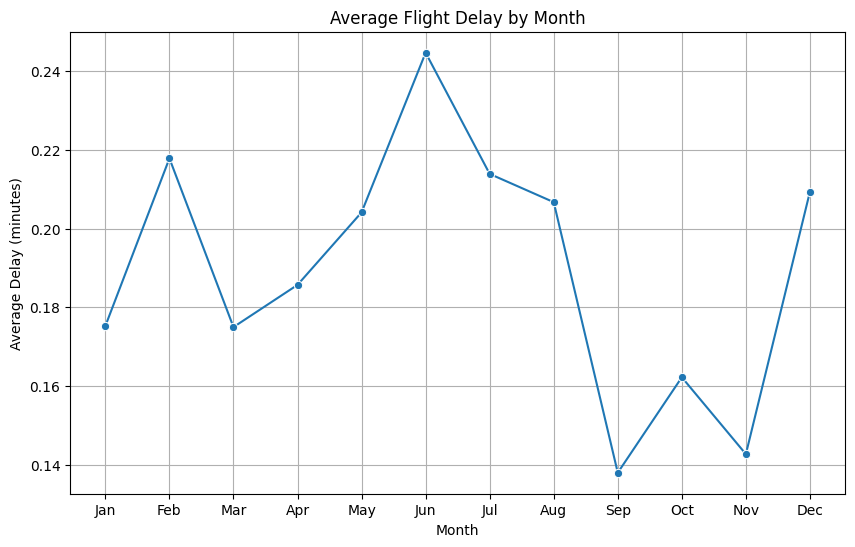

In [ ]:
avg_delay_by_month = data.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='DEP_DEL15', data=avg_delay_by_month, marker='o')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

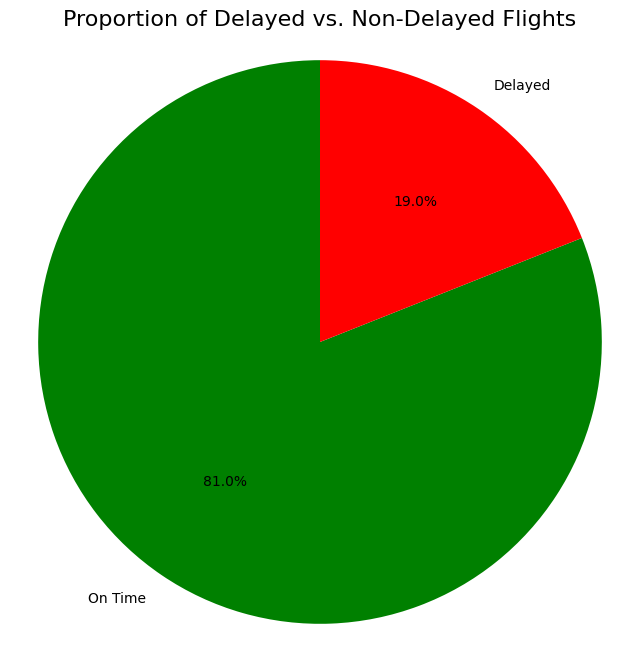

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

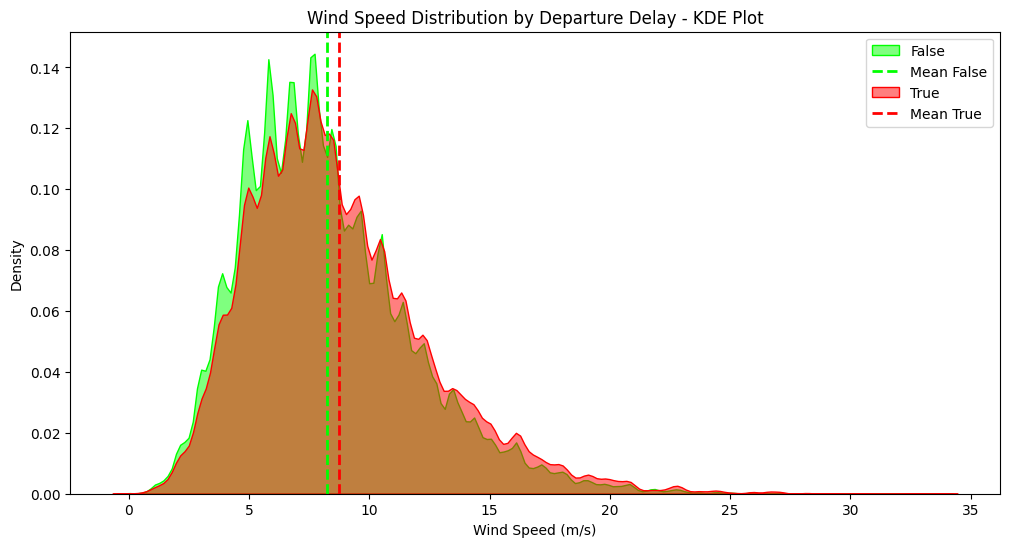

In [ ]:
data_class0 = data[data['DEP_DEL15'] == 0]['AWND']
data_class1 = data[data['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(12, 6))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

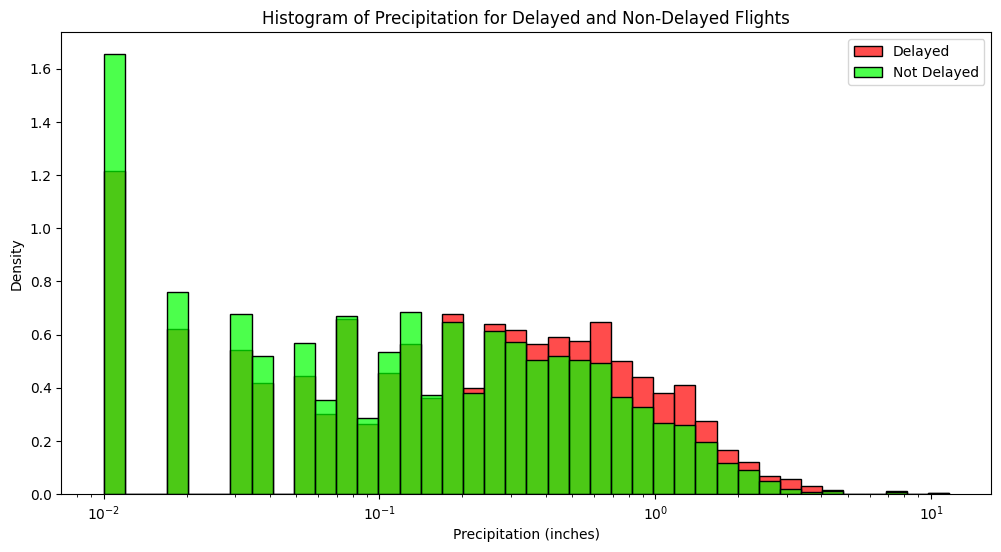

In [ ]:
plt.figure(figsize=(12, 6))
df_delayed = data[data['DEP_DEL15'] == 1]
df_not_delayed = data[data['DEP_DEL15'] == 0]
sns.histplot(df_delayed['PRCP'], color='red', label='Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
sns.histplot(df_not_delayed['PRCP'], color='lime', label='Not Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
plt.title('Histogram of Precipitation for Delayed and Non-Delayed Flights')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [16]:
data = pd.get_dummies(data, columns=['DEP_TIME_BLK'])

print(data.head())

   DEP_DEL15  DISTANCE_GROUP  CONCURRENT_FLIGHTS       DEPARTING_AIRPORT  \
0          0               2                  25  McCarran International   
1          0               7                  29  McCarran International   
2          0               7                  27  McCarran International   
3          0               9                  27  McCarran International   
4          0               7                  10  McCarran International   

   NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
0              143                  13056                 107363   
1              191                  13056                  73508   
2              199                  13056                  73508   
3              180                  13056                  73508   
4              182                  13056                  15023   

   AVG_MONTHLY_PASS_AIRPORT  AVG_MONTHLY_PASS_AIRLINE  PLANE_AGE  ...  \
0                   1903352                  13382999        

In [17]:
X = data.drop('DEP_DEL15', axis=1)
y = data['DEP_DEL15']

In [18]:
len(data)

6126700

In [19]:
sample_num = 250000

In [20]:
sampled_data = X.sample(n=sample_num, random_state=42)
sampled_target = y.loc[sampled_data.index]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sampled_data, sampled_target, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [24]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

rf_model.fit(X_train, y_train)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
rf_predictions = rf_model.predict(X_test)

gb_predictions = gb_model.predict(X_test)

knn_predictions = knn_model.predict(X_test)

In [29]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.79406
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     40045
           1       0.43      0.10      0.16      9955

    accuracy                           0.79     50000
   macro avg       0.62      0.53      0.52     50000
weighted avg       0.74      0.79      0.74     50000



In [30]:
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classifier:
Accuracy: 0.8022
Classification Report:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40045
           1       0.64      0.02      0.03      9955

    accuracy                           0.80     50000
   macro avg       0.72      0.51      0.46     50000
weighted avg       0.77      0.80      0.72     50000



In [31]:
print("KNN Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Classifier:
Accuracy: 0.77492
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     40045
           1       0.33      0.13      0.18      9955

    accuracy                           0.77     50000
   macro avg       0.57      0.53      0.53     50000
weighted avg       0.72      0.77      0.73     50000



In [32]:
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
r2 = r2_score(y_test, rf_predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.2059
Mean Absolute Error (MAE): 0.2059
Root Mean Squared Error (RMSE): 0.4538
R² Score: -0.2915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
mse = mean_squared_error(y_test, gb_predictions)
mae = mean_absolute_error(y_test, gb_predictions)
rmse = mean_squared_error(y_test, gb_predictions, squared=False)
r2 = r2_score(y_test, gb_predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.1978
Mean Absolute Error (MAE): 0.1978
Root Mean Squared Error (RMSE): 0.4447
R² Score: -0.2404


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
mse = mean_squared_error(y_test, knn_predictions)
mae = mean_absolute_error(y_test, knn_predictions)
rmse = mean_squared_error(y_test, knn_predictions, squared=False)
r2 = r2_score(y_test, knn_predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.2251
Mean Absolute Error (MAE): 0.2251
Root Mean Squared Error (RMSE): 0.4744
R² Score: -0.4115


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


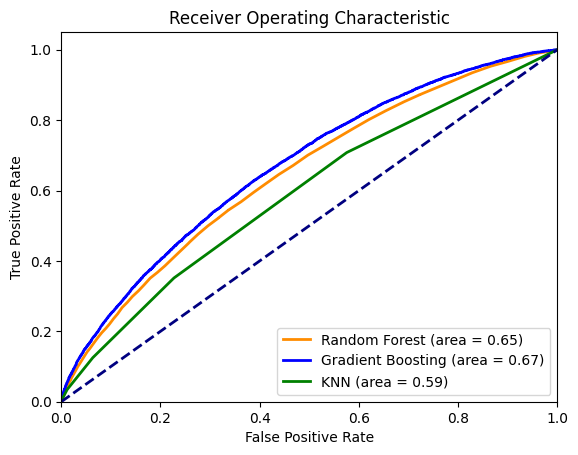

In [35]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
gb_roc_auc = auc(gb_fpr, gb_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='blue', lw=2, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

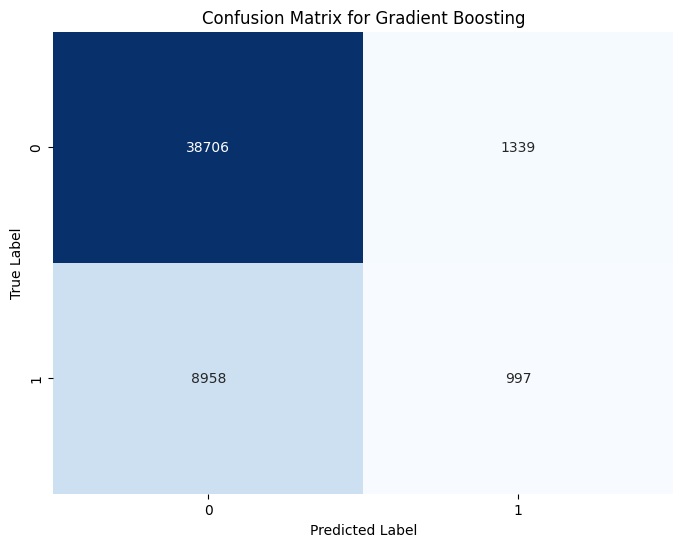

In [36]:
conf_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

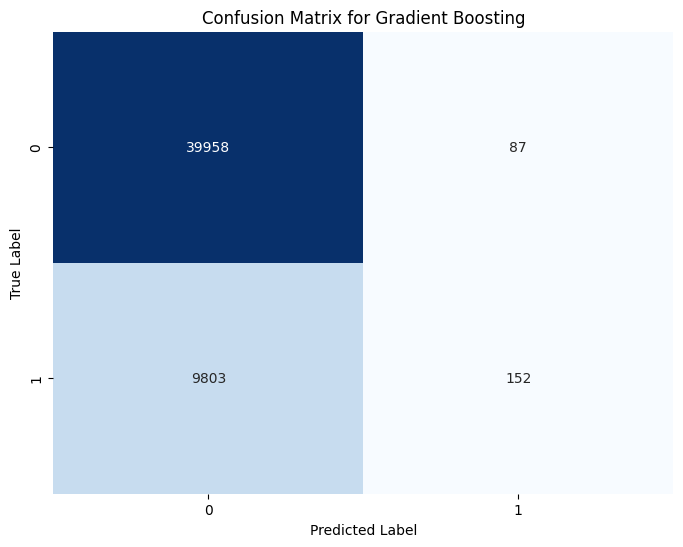

In [37]:
conf_matrix = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

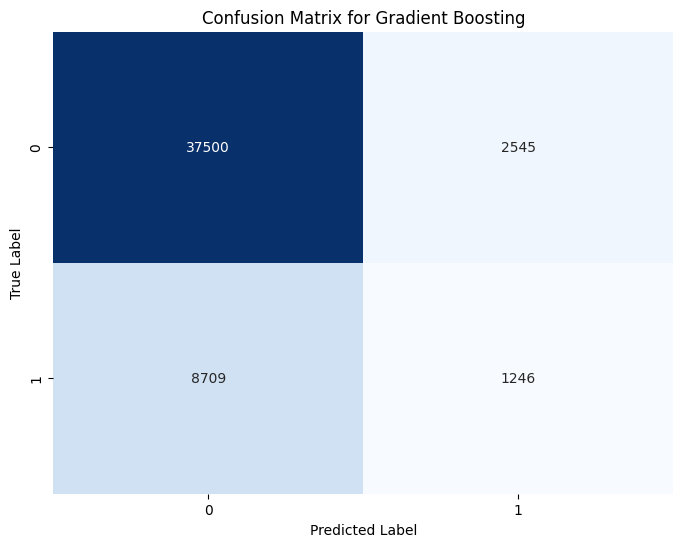

In [38]:
conf_matrix = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

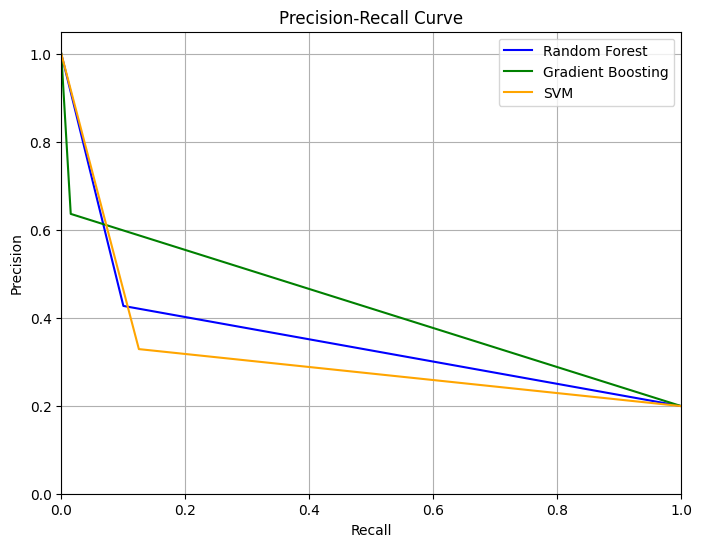

In [39]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_predictions)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_predictions)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_predictions)


plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', label='Random Forest')
plt.plot(recall_gb, precision_gb, color='green', label='Gradient Boosting')
plt.plot(recall_knn, precision_knn, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

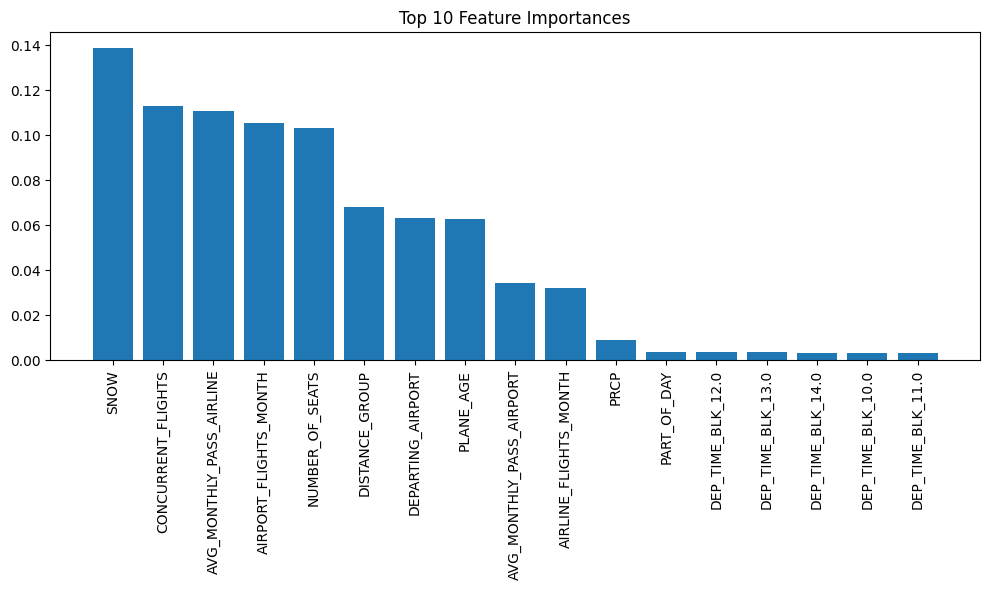

In [40]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 20
top_indices = indices[:top_n]

# Ensure top_indices does not exceed the length of X.columns
top_indices = [i for i in top_indices if i < len(X.columns)]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(len(top_indices)), importances[top_indices], align="center")
plt.xticks(range(len(top_indices)), X.columns[top_indices], rotation=90)
plt.tight_layout()
plt.show()